In [1]:
# 판다스 라이브러리 탑재
import pandas as pd

# CSV 파일 읽어오기
raw_data = pd.read_csv("C:\data\survey_results_public.csv")

# 데이터 확인하기
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [2]:
# 일부 데이터 확안하기
raw_data.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
# 필요한 열 추출
revised_data = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]

# 일부 값 확인
revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,25-34 years old,Slovakia,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Coding Bootcamp;Other online resources (ex: vi...
1,18-24 years old,Netherlands,JavaScript;Python,"Other online resources (ex: videos, blogs, etc..."
2,18-24 years old,Russian Federation,Assembly;C;Python;R;Rust,"Other online resources (ex: videos, blogs, etc..."
3,35-44 years old,Austria,JavaScript;TypeScript,NaN
4,25-34 years old,United Kingdom of Great Britain and Northern I...,Bash/Shell;HTML/CSS;Python;SQL,Friend or family member


In [4]:
# 연령대 확인하기
revised_data["Age"]

0        25-34 years old
1        18-24 years old
2        18-24 years old
3        35-44 years old
4        25-34 years old
              ...       
83434    25-34 years old
83435    18-24 years old
83436    25-34 years old
83437    25-34 years old
83438    18-24 years old
Name: Age, Length: 83439, dtype: object

In [5]:
# 중복 값 삭제하기
revised_data["Age"].drop_duplicates()

0         25-34 years old
1         18-24 years old
3         35-44 years old
6       Prefer not to say
14        45-54 years old
15     Under 18 years old
47      65 years or older
105       55-64 years old
149                   NaN
Name: Age, dtype: object

In [6]:
# 연령대 데이터 그룹화하기
revised_data.groupby(["Age"])

In [7]:
# 연령대 그룹별 크기 확인하기
size_by_age = revised_data.groupby(["Age"]).size()
size_by_age

Age
18-24 years old       20993
25-34 years old       32568
35-44 years old       15183
45-54 years old        5472
55-64 years old        1819
65 years or older       421
Prefer not to say       575
Under 18 years old     5376
dtype: int64

In [8]:
# 국가 그룹별 크기 확인하기
size_by_country = revised_data.groupby(["Country"]).size()
size_by_country

Country
Afghanistan                              65
Albania                                  73
Algeria                                  46
Andorra                                  12
Angola                                   27
                                       ... 
Venezuela, Bolivarian Republic of...    104
Viet Nam                                386
Yemen                                    20
Zambia                                   22
Zimbabwe                                 36
Length: 181, dtype: int64

<AxesSubplot:xlabel='Age'>

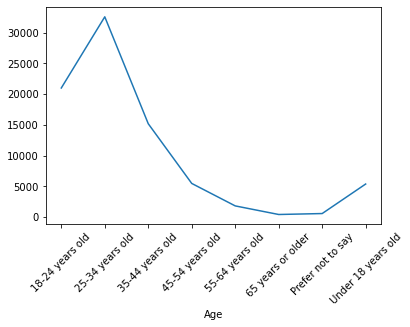

In [9]:
# 선 그래프 그리기
size_by_age.plot.line(rot=45)

<AxesSubplot:xlabel='Age'>

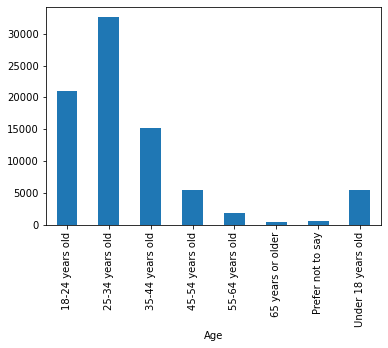

In [10]:
# 수직 막대그래프 그리기
size_by_age.plot.bar()

<AxesSubplot:ylabel='Age'>

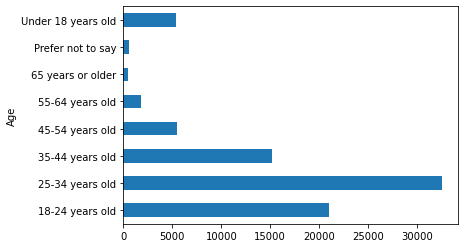

In [11]:
# 수평 막대그래프 그리기
size_by_age.plot.barh()

In [12]:
# 현재 색인 확인하기
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

In [13]:
# 재색인하기
reindxed_size_by_age = size_by_age.reindex(index=[
    'Prefer not to say',
    '65 years or older',
    '55-64 years old',         
    '45-54 years old', 
    '35-44 years old',
    '25-34 years old', 
    '18-24 years old', 
    'Under 18 years old' 
    ])

# 재색인한 결과 확인하기
reindxed_size_by_age

Age
Prefer not to say       575
65 years or older       421
55-64 years old        1819
45-54 years old        5472
35-44 years old       15183
25-34 years old       32568
18-24 years old       20993
Under 18 years old     5376
dtype: int64

<AxesSubplot:ylabel='Age'>

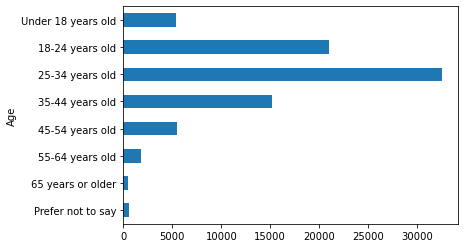

In [14]:
# 수평 그래프 다시 그리기
reindxed_size_by_age.plot.barh()

<AxesSubplot:ylabel='None'>

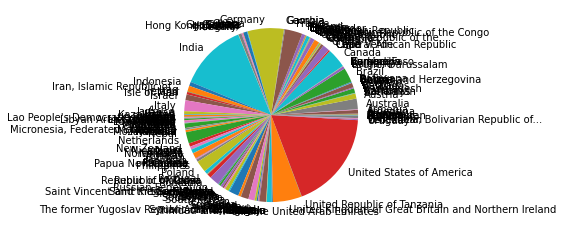

In [15]:
# 기본 파이 그래프 그리기
size_by_country.plot.pie()

<AxesSubplot:ylabel='None'>

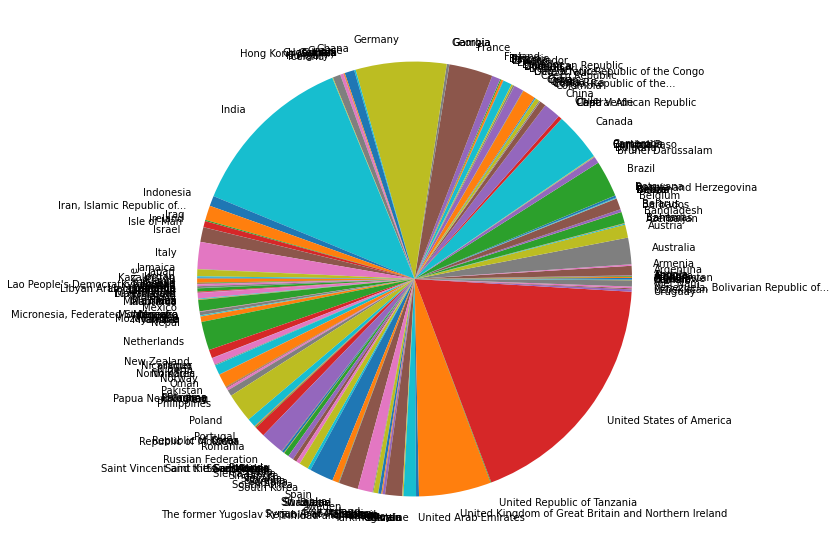

In [16]:
# 파이 그래프 크기 조정하기
size_by_country.plot.pie(figsize=(10, 10))

In [17]:
# 국가 상위 20개 확인하기
size_by_country.nlargest(20)

Country
United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Turkey                                                   1054


<AxesSubplot:ylabel='None'>

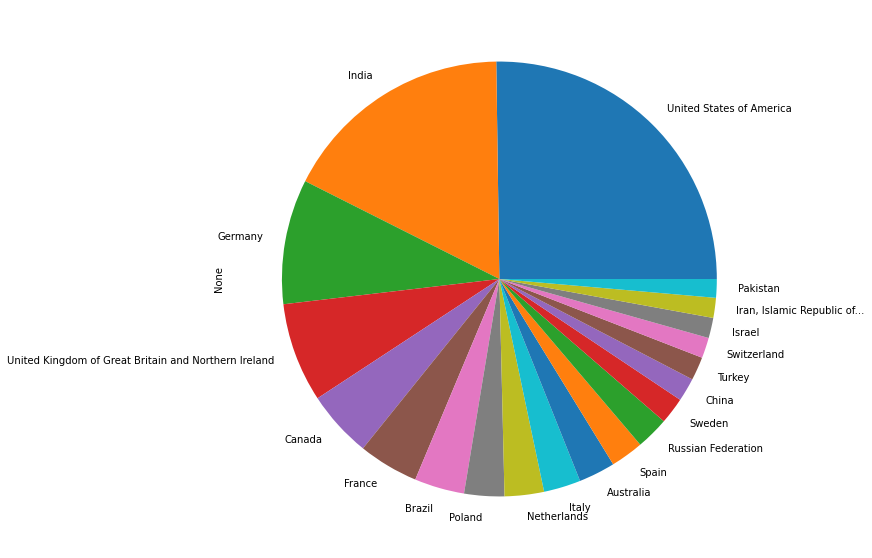

In [18]:
# 국가 상위 20개 파이 그래프 그리기
size_by_country.nlargest(20).plot.pie(figsize=(10, 10))

In [19]:
# 프로그래밍 언어 데이터 추출
languages = revised_data["LanguageHaveWorkedWith"]

# 데이터 확인
languages

0        C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                    JavaScript;Python
2                             Assembly;C;Python;R;Rust
3                                JavaScript;TypeScript
4                       Bash/Shell;HTML/CSS;Python;SQL
                             ...                      
83434                               Clojure;Kotlin;SQL
83435                                              NaN
83436                               Groovy;Java;Python
83437             Bash/Shell;JavaScript;Node.js;Python
83438           Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

In [20]:
# 데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(";")

# 데이터 확인
languages

0        [C++, HTML/CSS, JavaScript, Objective-C, PHP, ...
1                                     [JavaScript, Python]
2                           [Assembly, C, Python, R, Rust]
3                                 [JavaScript, TypeScript]
4                      [Bash/Shell, HTML/CSS, Python, SQL]
                               ...                        
83434                               [Clojure, Kotlin, SQL]
83435                                                  NaN
83436                               [Groovy, Java, Python]
83437            [Bash/Shell, JavaScript, Node.js, Python]
83438         [Delphi, Elixir, HTML/CSS, Java, JavaScript]
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

In [21]:
# 리스트 항목을 행으로 나누기
exploded_languages = languages.explode()

# 데이터 확인
exploded_languages

0                C++
0           HTML/CSS
0         JavaScript
0        Objective-C
0                PHP
            ...     
83438         Delphi
83438         Elixir
83438       HTML/CSS
83438           Java
83438     JavaScript
Name: LanguageHaveWorkedWith, Length: 443642, dtype: object

In [22]:
# 프로그래밍 별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

# 데이터 확인
size_by_languages

LanguageHaveWorkedWith
APL              536
Assembly        4632
Bash/Shell     22385
C              17329
C#             22984
C++            20057
COBOL            437
Clojure         1552
Crystal          466
Dart            4965
Delphi          1731
Elixir          1438
Erlang           651
F#               804
Go              7879
Groovy          2479
HTML/CSS       46259
Haskell         1749
Java           29162
JavaScript     53587
Julia           1068
Kotlin          6866
LISP            1096
Matlab          3846
Node.js        27975
Objective-C     2310
PHP            18130
Perl            2028
PowerShell      8871
Python         39792
R               4185
Ruby            5569
Rust            5799
SQL            38835
Scala           2148
Swift           4204
TypeScript     24909
VBA             3847
Name: LanguageHaveWorkedWith, dtype: int64

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

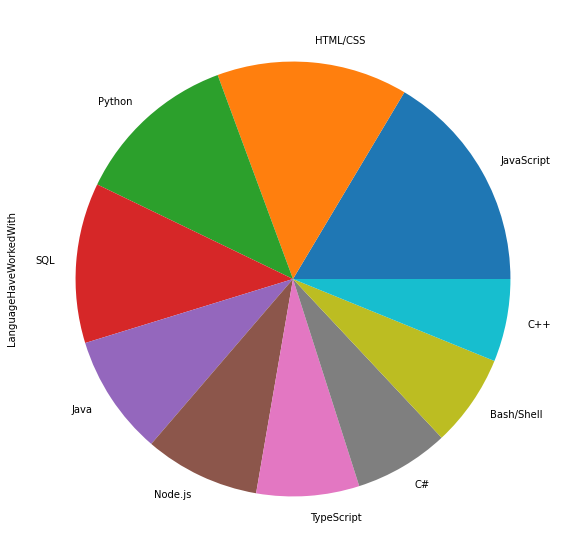

In [23]:
# 파이 그래프 그리기
size_by_languages.nlargest(10).plot.pie(figsize=(10, 10))

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

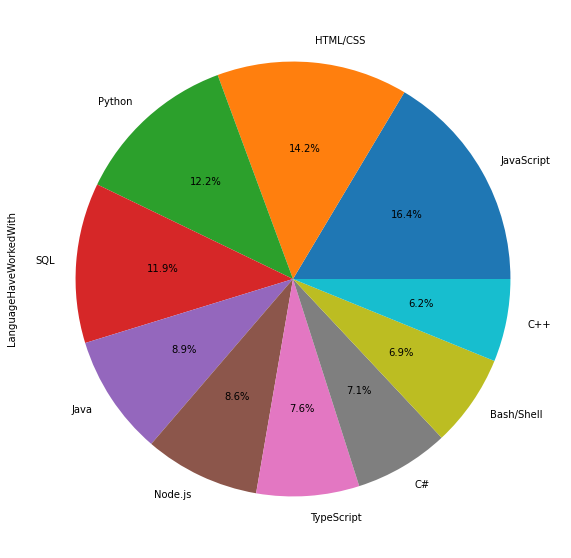

In [24]:
# 백분율 표기하기
size_by_languages.nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.1f%%')

In [25]:
# 25~34세 연령대가 사용한 프로그래밍 언어 정보 추출
languages_for_25_34 = revised_data[revised_data.Age == '25-34 years old']["LanguageHaveWorkedWith"].str.split(";").explode()

# 데이터 확인
languages_for_25_34

0                C++
0           HTML/CSS
0         JavaScript
0        Objective-C
0                PHP
            ...     
83436         Python
83437     Bash/Shell
83437     JavaScript
83437        Node.js
83437         Python
Name: LanguageHaveWorkedWith, Length: 166137, dtype: object

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

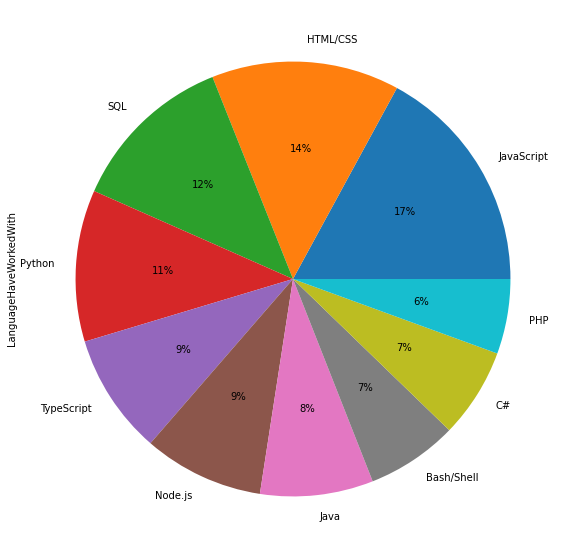

In [26]:
# 상위 10개 데이터 파이 그래프 그리기
languages_for_25_34.groupby(languages_for_25_34).size().nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.0f%%')